# Topic: Social Media Influence on Public Opinion

# Importing Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Loading and Previewing dataset

In [2]:
tweets_data = pd.read_csv('Raw Data/tweets.csv', encoding='latin1')
covid_tweets = pd.read_csv('Raw Data\Corona_NLP_train.csv', encoding='latin1')
reddit_data = pd.read_csv('Raw Data/reddit_data.csv', encoding='latin1')
twitter_data = pd.read_csv('Raw Data/twitter_data.csv', encoding='latin1')

# Preview the first 5 lines of the loaded data
print(tweets_data.head())
print(covid_tweets.head())
print(reddit_data.head())
print(twitter_data.head())

  Unnamed: 0                       Date          User  \
0          0  2023-03-29 15:42:36+00:00   AnandPatni8   
1          1  2023-03-29 15:42:05+00:00      dhinamum   
2          2  2023-03-29 15:34:29+00:00  PrincetonCGI   
3          3  2023-03-29 15:31:43+00:00  RishiJoeSanu   
4          4  2023-03-29 15:26:48+00:00  itweetsensee   

                                               Tweet  Likes  Retweets  
0  @vinodkapri @RahulGandhi Respected Indian Citi...    0.0       0.0  
1  *Respected Indian Citizens,* Namaskaar I Am Th...    0.0       0.0  
2  1/n-Meet Filmmaker Prakash Jha in New Jersey t...    0.0       0.0  
3  @MrinalWahal Why would politicians stop using ...    0.0       0.0  
4  @annamalai_k @narendramodi A state level presi...    0.0       0.0  
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754  

In [3]:
# Data Preprocessing
# Check for missing values
print(tweets_data.isnull().sum())
print(covid_tweets.isnull().sum())
print(reddit_data.isnull().sum())
print(twitter_data.isnull().sum())

# Drop missing values
tweets_data = tweets_data.dropna()
covid_tweets = covid_tweets.dropna()
reddit_data = reddit_data.dropna()
twitter_data = twitter_data.dropna()

# drop unnamed columns
tweets_data = tweets_data.drop(['Unnamed: 0'], axis=1)

Unnamed: 0    0
Date          0
User          0
Tweet         1
Likes         2
Retweets      2
dtype: int64
UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64
clean_comment    100
category           0
dtype: int64
clean_text    4
category      7
dtype: int64


In [4]:
# Data Cleaning
import re

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Removed @mentions
    text = re.sub(r'#', '', text)  # Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text)  # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Removing the hyper link
    return text

In [5]:
# Normalize the text
if 'text' in tweets_data.columns:
    tweets_data['tweet'] = tweets_data['tweet'].apply(clean_text)
if 'OriginalTweet' in covid_tweets.columns:
    covid_tweets['OriginalTweet'] = covid_tweets['OriginalTweet'].apply(clean_text)
if 'text' in reddit_data.columns:
    reddit_data['text'] = reddit_data['text'].apply(clean_text)
if 'text' in twitter_data.columns:
    twitter_data['text'] = twitter_data['text'].apply(clean_text)


In [6]:
# Lowercasing the text
if 'text' in tweets_data.columns:
    tweets_data['tweet'] = tweets_data['tweet'].str.lower()
if 'OriginalTweet' in covid_tweets.columns:
    covid_tweets['OriginalTweet'] = covid_tweets['OriginalTweet'].str.lower()
if 'text' in reddit_data.columns:
    reddit_data['text'] = reddit_data['text'].str.lower()
if 'text' in twitter_data.columns:
    twitter_data['text'] = twitter_data['text'].str.lower()

In [7]:
# Lowercasing the column name
tweets_data.columns = tweets_data.columns.str.lower()
covid_tweets.columns = covid_tweets.columns.str.lower()
reddit_data.columns = reddit_data.columns.str.lower()
twitter_data.columns = twitter_data.columns.str.lower()


In [8]:
tweets_data.head()

# sort date column into date, time and hour
tweets_data['date'] = pd.to_datetime(tweets_data['date'])
tweets_data['time'] = tweets_data['date'].dt.time
tweets_data['hour'] = tweets_data['date'].dt.hour
tweets_data['date'] = tweets_data['date'].dt.date

# remove @ , * and # from tweet column
tweets_data['tweet'] = tweets_data['tweet'].str.replace('@', '')
tweets_data['tweet'] = tweets_data['tweet'].str.replace('*', '')
tweets_data['tweet'] = tweets_data['tweet'].str.replace('#', '')

# remove special characters from tweet column
tweets_data['tweet'] = tweets_data['tweet'].str.replace('[^\w\s]', '')

# remove numbers from tweet column
tweets_data['tweet'] = tweets_data['tweet'].str.replace('\d+', '')

# remove extra spaces from tweet column
tweets_data['tweet'] = tweets_data['tweet'].str.replace(' +', ' ')

# remove stopwords from tweet column
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets_data['tweet'] = tweets_data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# remove punctuation from tweet column
tweets_data['tweet'] = tweets_data['tweet'].str.replace('[^\w\s]', '')

# show cleaned data
tweets_data.head()

,date,user,tweet,likes,retweets,time,hour
0,2023-03-29,AnandPatni8,vinodkapri RahulGandhi Respected Indian Citize...,0.0,0.0,15:42:36,15
1,2023-03-29,dhinamum,"Respected Indian Citizens, Namaskaar I Am The ...",0.0,0.0,15:42:05,15
2,2023-03-29,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha New Jersey talk...,0.0,0.0,15:34:29,15
3,2023-03-29,RishiJoeSanu,MrinalWahal Why would politicians stop using r...,0.0,0.0,15:31:43,15
4,2023-03-29,itweetsensee,annamalai_k narendramodi A state level preside...,0.0,0.0,15:26:48,15


In [9]:
# 1/n- remove this from tweet column
tweets_data['tweet'] = tweets_data['tweet'].str.replace('1/n', '')

# remove - from tweet column
tweets_data['tweet'] = tweets_data['tweet'].str.replace('-', '')


# shiw cleaned data
tweets_data.head()


,date,user,tweet,likes,retweets,time,hour
0,2023-03-29,AnandPatni8,vinodkapri RahulGandhi Respected Indian Citize...,0.0,0.0,15:42:36,15
1,2023-03-29,dhinamum,"Respected Indian Citizens, Namaskaar I Am The ...",0.0,0.0,15:42:05,15
2,2023-03-29,PrincetonCGI,Meet Filmmaker Prakash Jha New Jersey talking ...,0.0,0.0,15:34:29,15
3,2023-03-29,RishiJoeSanu,MrinalWahal Why would politicians stop using r...,0.0,0.0,15:31:43,15
4,2023-03-29,itweetsensee,annamalai_k narendramodi A state level preside...,0.0,0.0,15:26:48,15


In [10]:
# save cleaned data as csv into cleaned data folder
tweets_data.to_csv('Cleaned Data/tweets_cleaned.csv', index=False)

In [11]:
# Show covid_tweets data
covid_tweets.head()


,username,screenname,location,tweetat,originaltweet,sentiment
0,3799,48751,London,16-03-2020,_gahan and and,Neutral
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news of the regionâs first confirmed covid...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier at grocery store was sharing his insig...,Positive


In [12]:
# drop username, screenmane and  location column
covid_tweets = covid_tweets.drop(['username', 'screenname', 'location'], axis=1)

# show cleaned data
covid_tweets.head()

,tweetat,originaltweet,sentiment
0,16-03-2020,_gahan and and,Neutral
1,16-03-2020,advice talk to your neighbours family to excha...,Positive
2,16-03-2020,coronavirus australia: woolworths to give elde...,Positive
5,16-03-2020,as news of the regionâs first confirmed covid...,Positive
6,16-03-2020,cashier at grocery store was sharing his insig...,Positive


In [13]:
# Change name tweetat to date, originaltweet to tweet
covid_tweets.rename(columns={'tweetat': 'date', 'originaltweet': 'tweet'}, inplace=True)

# show cleaned data
covid_tweets.head()

,date,tweet,sentiment
0,16-03-2020,_gahan and and,Neutral
1,16-03-2020,advice talk to your neighbours family to excha...,Positive
2,16-03-2020,coronavirus australia: woolworths to give elde...,Positive
5,16-03-2020,as news of the regionâs first confirmed covid...,Positive
6,16-03-2020,cashier at grocery store was sharing his insig...,Positive


In [14]:
# remove @ , * and #, _ from tweet column
covid_tweets['tweet'] = covid_tweets['tweet'].str.replace('@', '')
covid_tweets['tweet'] = covid_tweets['tweet'].str.replace('*', '')
covid_tweets['tweet'] = covid_tweets['tweet'].str.replace('#', '')
covid_tweets['tweet'] = covid_tweets['tweet'].str.replace('_', '')

# remove special characters from tweet column
covid_tweets['tweet'] = covid_tweets['tweet'].str.replace('[^\w\s]', '')

# remove numbers from tweet column
covid_tweets['tweet'] = covid_tweets['tweet'].str.replace('\d+', '')

# remove extra spaces from tweet column
covid_tweets['tweet'] = covid_tweets['tweet'].str.replace(' +', ' ')

# remove stopwords from tweet column
covid_tweets['tweet'] = covid_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# remove punctuation from tweet column
covid_tweets['tweet'] = covid_tweets['tweet'].str.replace('[^\w\s]', '')

# show cleaned data
covid_tweets.head()

,date,tweet,sentiment
0,16-03-2020,gahan,Neutral
1,16-03-2020,advice talk neighbours family exchange phone n...,Positive
2,16-03-2020,coronavirus australia: woolworths give elderly...,Positive
5,16-03-2020,news regionâs first confirmed covid-19 case c...,Positive
6,16-03-2020,cashier grocery store sharing insights covid19...,Positive


In [15]:
# save cleaned data as csv into cleaned data folder
covid_tweets.to_csv('Cleaned Data/covid_tweets_cleaned.csv', index=False)

In [16]:
# show reddit_data data
reddit_data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [17]:
# remove special characters from clean_comment column
reddit_data['clean_comment'] = reddit_data['clean_comment'].str.replace('[^\w\s]', '')

# remove numbers from clean_comment column
reddit_data['clean_comment'] = reddit_data['clean_comment'].str.replace('\d+', '')

# remove extra spaces from clean_comment column
reddit_data['clean_comment'] = reddit_data['clean_comment'].str.replace(' +', ' ')

# remove stopwords from clean_comment column
reddit_data['clean_comment'] = reddit_data['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# remove punctuation from clean_comment column
reddit_data['clean_comment'] = reddit_data['clean_comment'].str.replace('[^\w\s]', '')

# show cleaned data
reddit_data.head()


,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal wrappi...,0
4,benefit may want read living buddha living chr...,1


In [18]:
# save cleaned data as csv into cleaned data folder
reddit_data.to_csv('Cleaned Data/reddit_data_cleaned.csv', index=False)

In [19]:
# show twitter_data data
twitter_data.head()

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [20]:
# remove special characters from clean_text column
twitter_data['clean_text'] = twitter_data['clean_text'].str.replace('[^\w\s]', '')

# remove numbers from clean_text column
twitter_data['clean_text'] = twitter_data['clean_text'].str.replace('\d+', '')

# remove extra spaces from clean_text column
twitter_data['clean_text'] = twitter_data['clean_text'].str.replace(' +', ' ')

# remove stopwords from clean_text column
twitter_data['clean_text'] = twitter_data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# remove punctuation from clean_text column
twitter_data['clean_text'] = twitter_data['clean_text'].str.replace('[^\w\s]', '')

# remove â from clean_text column
twitter_data['clean_text'] = twitter_data['clean_text'].str.replace('â', '')


# show cleaned data
twitter_data.head()

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


In [21]:
# save cleaned data as csv into cleaned data folder
twitter_data.to_csv('Cleaned Data/twitter_data_cleaned.csv', index=False)

# Exploratory Data Analysis (EDA)
EDA Objectives:
1. Understand User Engagement: How do likes, retweets, and comments reflect public opinion?
2. Time-Based Analysis: How does sentiment or engagement change over time?
3. Sentiment Distribution: What is the general sentiment in the data?
4. Text Analysis: What are the most common words or topics?

In [22]:
# EDA for tweets data

# Summary statistics for numerical columns
print(tweets_data[['likes', 'retweets']].describe())

# Distribution of tweet lengths
tweets_data['tweet_length'] = tweets_data['tweet'].apply(len)
print(tweets_data['tweet_length'].describe())



              likes      retweets
count  49999.000000  49999.000000
mean      16.213384      3.594672
std      243.116572     53.452615
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        2.000000      0.000000
max    20716.000000   6551.000000
count    49999.000000
mean       163.024760
std         68.831122
min         15.000000
25%        107.000000
50%        168.000000
75%        216.000000
max        907.000000
Name: tweet_length, dtype: float64


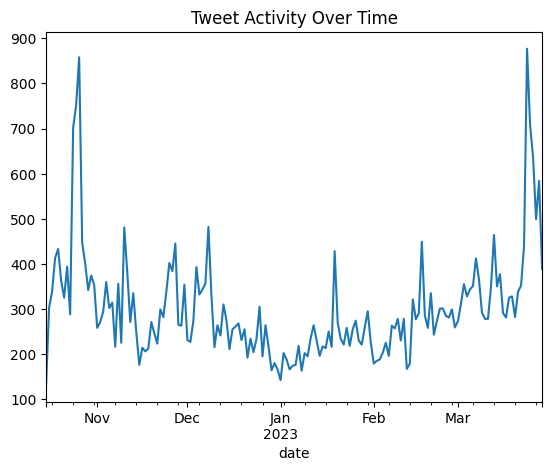

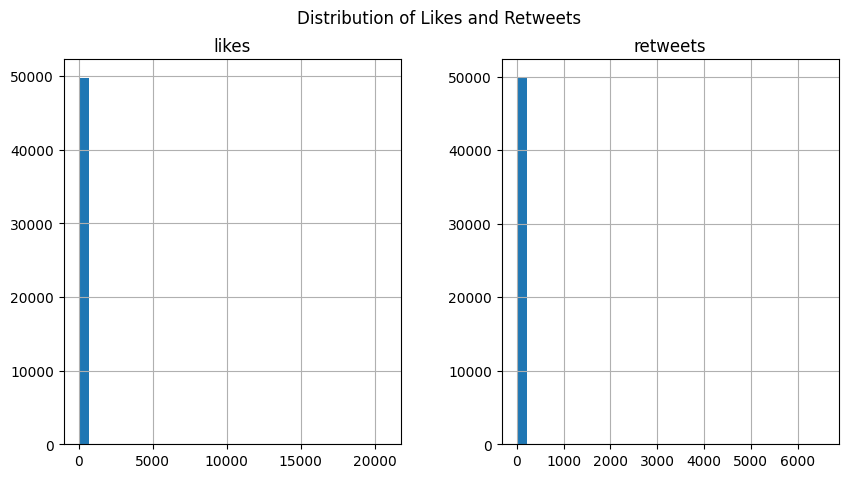

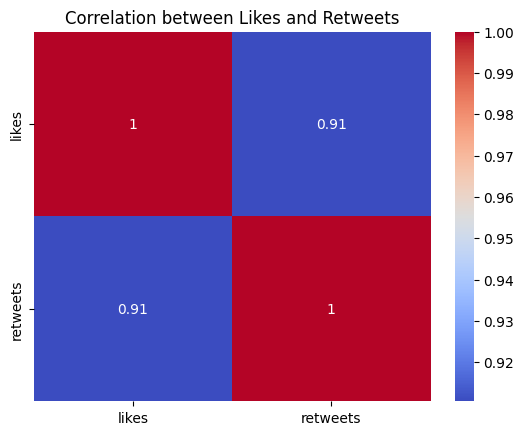

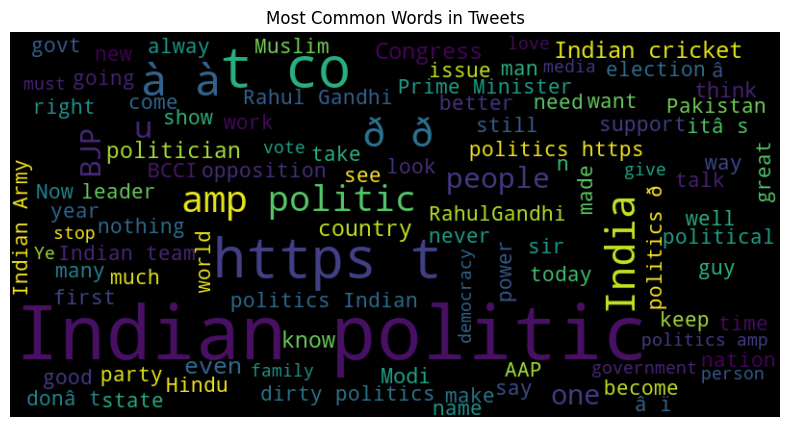

In [23]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Tweet activity over time
tweets_data['date'] = pd.to_datetime(tweets_data['date'])
tweets_data['date'].value_counts().sort_index().plot(kind='line', title='Tweet Activity Over Time')
plt.show()

# Engagement distribution
tweets_data[['likes', 'retweets']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Distribution of Likes and Retweets')
plt.show()

# Correlation analysis
correlation = tweets_data[['likes', 'retweets']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Likes and Retweets')
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(tweets_data['tweet']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.show()


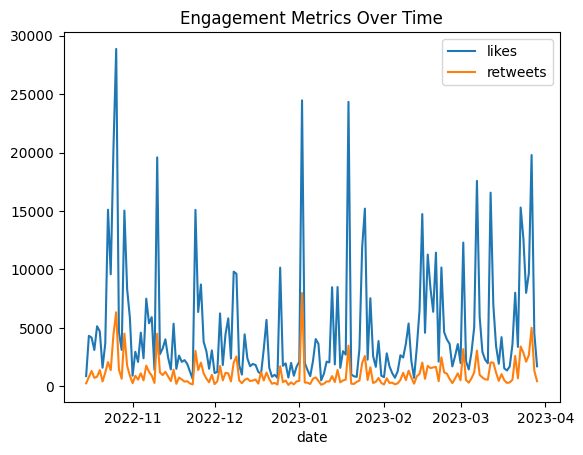

In [24]:
# Plot engagement metrics over time
tweets_data['date'] = pd.to_datetime(tweets_data['date'])
tweets_data['date'] = tweets_data['date'].dt.date
engagement = tweets_data.groupby('date')[['likes', 'retweets']].sum()
engagement.plot(kind='line', title='Engagement Metrics Over Time')
plt.show()


In [25]:
# EDA for covid_tweets data

# Summary statistics for sentiment
print(covid_tweets['sentiment'].value_counts())

# Distribution of tweet lengths
covid_tweets['tweet_length'] = covid_tweets['tweet'].apply(len)
print(covid_tweets['tweet_length'].describe())



sentiment
Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: count, dtype: int64
count    32567.000000
mean       138.829951
std         51.082327
min          0.000000
25%         99.000000
50%        144.000000
75%        179.000000
max        286.000000
Name: tweet_length, dtype: float64


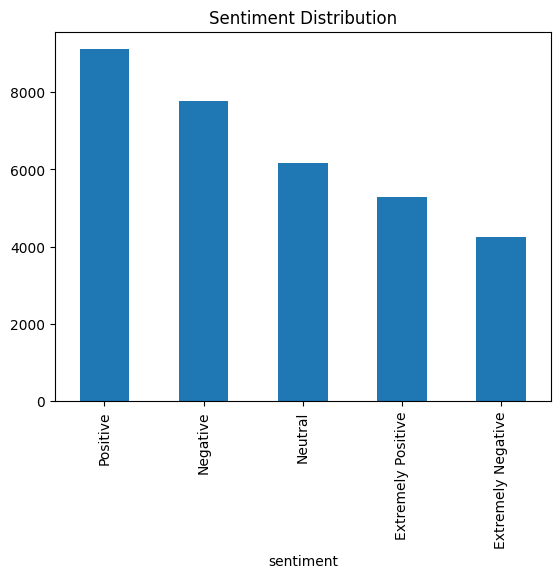

C:\Users\Shubham Singh\AppData\Local\Temp\ipykernel_19852\3653978210.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  covid_tweets['date'] = pd.to_datetime(covid_tweets['date'])


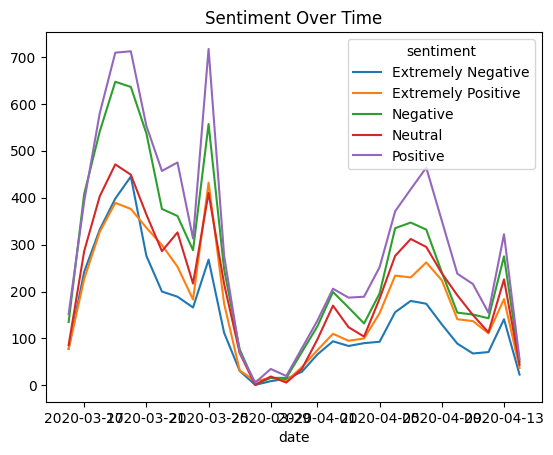

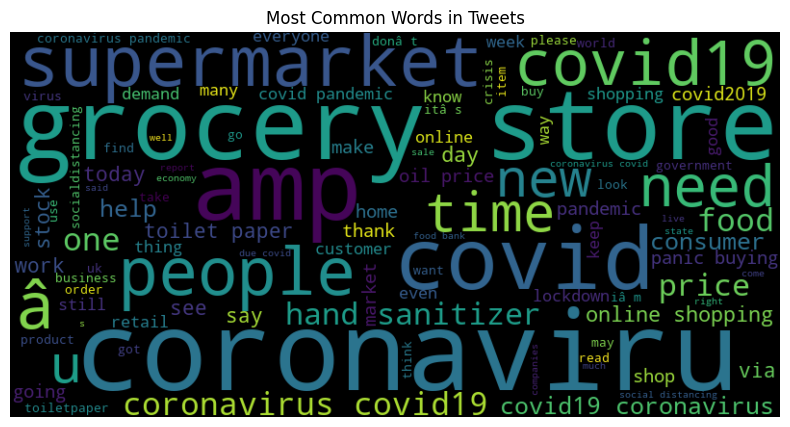

In [26]:
# Visualization

# Sentiment distribution
covid_tweets['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


# Sentiment over time
covid_tweets['date'] = pd.to_datetime(covid_tweets['date'])
covid_tweets.groupby(covid_tweets['date'].dt.date)['sentiment'].value_counts().unstack().plot(kind='line')
plt.title('Sentiment Over Time')
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(covid_tweets['tweet']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.show()



In [27]:
# EDA for Reddit data

# Distribution of comment lengths
reddit_data['comment_length'] = reddit_data['clean_comment'].apply(len)
print(reddit_data['comment_length'].describe())

# Distribution of categories
print(reddit_data['category'].value_counts())


count    37149.000000
mean       136.029960
std        278.509193
min          0.000000
25%         28.000000
50%         61.000000
75%        136.000000
max       6722.000000
Name: comment_length, dtype: float64
category
 1    15830
 0    13042
-1     8277
Name: count, dtype: int64


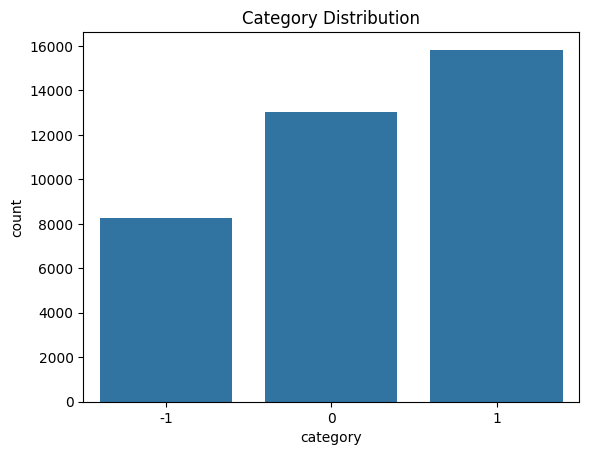

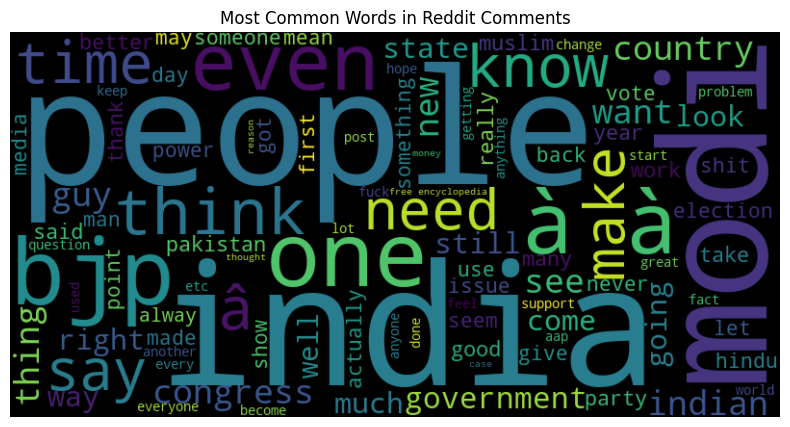

In [28]:
# Visualization

# Category distribution
sns.countplot(data=reddit_data, x='category')
plt.title('Category Distribution')
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(reddit_data['clean_comment']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reddit Comments')
plt.show()


In [29]:
# EDA for Twitter data

# Distribution of text lengths
twitter_data['text_length'] = twitter_data['clean_text'].apply(len)
print(twitter_data['text_length'].describe())

# Distribution of categories
print(twitter_data['category'].value_counts())

count    162969.000000
mean         98.199369
std          54.647960
min           0.000000
25%          53.000000
50%          90.000000
75%         142.000000
max         311.000000
Name: text_length, dtype: float64
category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64


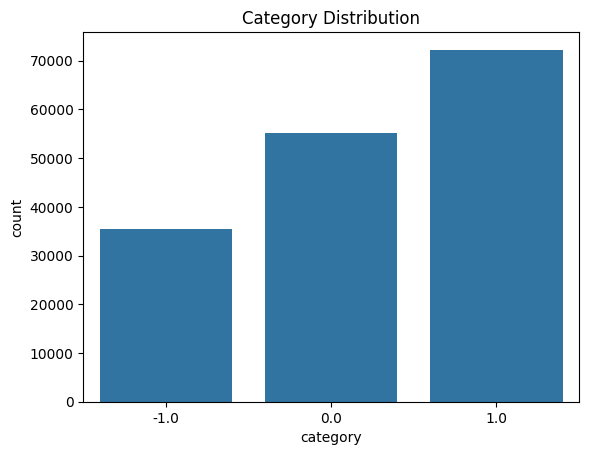

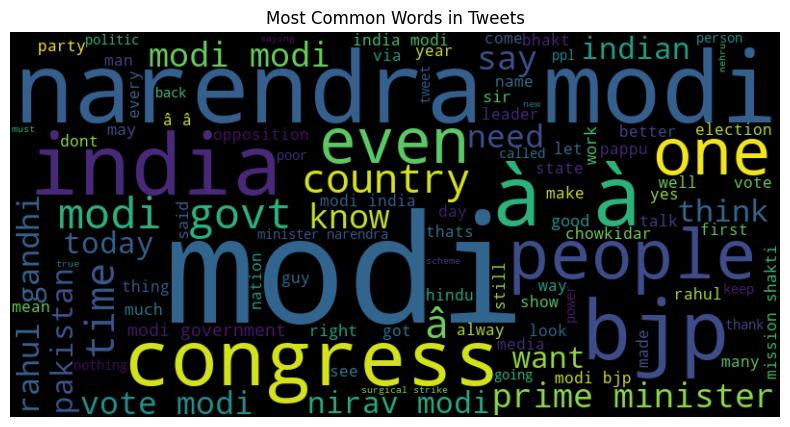

In [30]:
# Visualization

# Category distribution
sns.countplot(data=twitter_data, x='category')
plt.title('Category Distribution')
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(twitter_data['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.show()


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Function to create and display n-grams
def generate_ngrams(data, n=2):
    # Use CountVectorizer to create n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(data)
    
    # Sum the occurrences of each n-gram
    ngrams_sum = ngrams.sum(axis=0)
    
    # Create a DataFrame with the n-grams and their frequencies
    ngrams_freq = [(ngram, ngrams_sum[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
    ngrams_freq = sorted(ngrams_freq, key = lambda x: x[1], reverse=True)
    
    # Convert to DataFrame for better visualization
    df_ngrams = pd.DataFrame(ngrams_freq, columns=['N-gram', 'Frequency'])
    
    return df_ngrams

# Generate and display bigrams
df_bigrams = generate_ngrams(tweets_data['tweet'], n=2)
print(df_bigrams.head(10))

# Generate and display trigrams
df_trigrams = generate_ngrams(tweets_data['tweet'], n=3)
print(df_trigrams.head(10))

# Generate and display quadgrams
df_quadgrams = generate_ngrams(tweets_data['tweet'], n=4)
print(df_quadgrams.head(10))





            N-gram  Frequency
0  indian politics      25941
1         https co      11736
2   indian cricket       1820
3   politics https       1360
4     rahul gandhi       1257
5  politics indian       1032
6   dirty politics        903
7      indian team        727
8   prime minister        715
9      indian army        703
                       N-gram  Frequency
0           politics https co       1360
1       indian politics https        720
2      leader indian politics        511
3     history indian politics        478
4         indian cricket team        367
5          in indian politics        345
6         indian politics amp        318
7          indian politics he        288
8    unbeatable leader indian        282
9  ultimate unbeatable leader        278
                                   N-gram  Frequency
0                indian politics https co        720
1       unbeatable leader indian politics        282
2       ultimate unbeatable leader indian        278
3      

In [32]:
# N gram analysis for covid_tweets data

# Generate and display bigrams
df_bigrams = generate_ngrams(covid_tweets['tweet'], n=2)
print(df_bigrams.head(10))

# Generate and display trigrams
df_trigrams = generate_ngrams(covid_tweets['tweet'], n=3)
print(df_trigrams.head(10))

# Generate and display quadgrams
df_quadgrams = generate_ngrams(covid_tweets['tweet'], n=4)
print(df_quadgrams.head(10))


                N-gram  Frequency
0             covid 19       9133
1        grocery store       3695
2  coronavirus covid19       1337
3       hand sanitizer       1220
4  covid19 coronavirus       1143
5      online shopping       1056
6         toilet paper        958
7         panic buying        888
8          19 pandemic        785
9           oil prices        780
                  N-gram  Frequency
0      covid 19 pandemic        770
1           due covid 19        465
2  grocery store workers        328
3        covid 19 crisis        313
4      covid 19 outbreak        307
5   coronavirus covid 19        287
6          amid covid 19        275
7   covid 19 coronavirus        262
8       go grocery store        222
9        spread covid 19        206
                                           N-gram  Frequency
0                          amid covid 19 pandemic         71
1                        tested positive covid 19         54
2                          amid covid 19 outbre

In [33]:
# N gram analysis for reddit_data data

# Generate and display bigrams
df_bigrams = generate_ngrams(reddit_data['clean_comment'], n=2)
print(df_bigrams.head(10))

# Generate and display trigrams
df_trigrams = generate_ngrams(reddit_data['clean_comment'], n=3)
print(df_trigrams.head(10))

# Generate and display quadgrams
df_quadgrams = generate_ngrams(reddit_data['clean_comment'], n=4)
print(df_quadgrams.head(10))


              N-gram  Frequency
0  free encyclopedia        623
1  encyclopedia team        598
2     prime minister        383
3       best overall        375
4          good good        352
5         looks like        337
6       team reached        322
7       social media        316
8        movie movie        276
9      narendra modi        262
                      N-gram  Frequency
0     free encyclopedia team        598
1             good good good        333
2  encyclopedia team reached        316
3          movie movie movie        266
4          team reached free        224
5  reached free encyclopedia        223
6                lot lot lot        214
7     best overall submitter        204
8     overall submitter best        195
9     submitter best overall        194
                             N-gram  Frequency
0               good good good good        320
1    free encyclopedia team reached        316
2           movie movie movie movie        257
3    team reached fr

In [34]:
# N gram analysis for twitter_data data

# Generate and display bigrams
df_bigrams = generate_ngrams(twitter_data['clean_text'], n=2)
print(df_bigrams.head(10))

# Generate and display trigrams
df_trigrams = generate_ngrams(twitter_data['clean_text'], n=3)
print(df_trigrams.head(10))

# Generate and display quadgrams
df_quadgrams = generate_ngrams(twitter_data['clean_text'], n=4)
print(df_quadgrams.head(10))




            N-gram  Frequency
0    narendra modi      10033
1        modi govt       4731
2   prime minister       3971
3        vote modi       3302
4     rahul gandhi       3019
5  modi government       2642
6       nirav modi       2542
7        like modi       1864
8        modi modi       1722
9   mission shakti       1648
                    N-gram  Frequency
0  prime minister narendra       1396
1   minister narendra modi       1256
2             via namo app        912
3       shri narendra modi        605
4       model code conduct        602
5      prime minister modi        468
6      lok sabha elections        450
7      modi address nation        403
8          modi hai mumkin        352
9           hai mumkin hai        352
                           N-gram  Frequency
0    prime minister narendra modi       1219
1             modi hai mumkin hai        325
2        lok sabha elections 2019        148
3   modi addresses public meeting        140
4    narendra modi address 

In [35]:
# Sentiment Analysis
from textblob import TextBlob

# Function to get the sentiment of a text
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the tweet column
tweets_data['sentiment'] = tweets_data['tweet'].apply(get_sentiment)

# Display the first 5 rows
print(tweets_data[['tweet', 'sentiment']].head())

# Apply the function to the tweet column
covid_tweets['sentiment'] = covid_tweets['tweet'].apply(get_sentiment)

# Display the first 5 rows
print(covid_tweets[['tweet', 'sentiment']].head())

# Apply the function to the clean_comment column
reddit_data['sentiment'] = reddit_data['clean_comment'].apply(get_sentiment)

# Display the first 5 rows
print(reddit_data[['clean_comment', 'sentiment']].head())

# Apply the function to the clean_text column
twitter_data['sentiment'] = twitter_data['clean_text'].apply(get_sentiment)

# Display the first 5 rows
print(twitter_data[['clean_text', 'sentiment']].head())

                                               tweet  sentiment
0  vinodkapri RahulGandhi Respected Indian Citize...  -0.062500
1  Respected Indian Citizens, Namaskaar I Am The ...  -0.062500
2  Meet Filmmaker Prakash Jha New Jersey talking ...   0.173232
3  MrinalWahal Why would politicians stop using r...   0.000000
4  annamalai_k narendramodi A state level preside...   0.214286
                                               tweet  sentiment
0                                              gahan   0.000000
1  advice talk neighbours family exchange phone n...   0.166667
2  coronavirus australia: woolworths give elderly...  -0.200000
5  news regionâs first confirmed covid-19 case c...   0.154167
6  cashier grocery store sharing insights covid19...   0.000000
                                       clean_comment  sentiment
0  family mormon never tried explain still stare ...   0.216667
1  buddhism much lot compatible christianity espe...   0.160554
2  seriously say thing first get complex

In [36]:
# Save the cleaned data
tweets_data.to_csv('Cleaned Data/tweets_cleaned.csv', index=False)
covid_tweets.to_csv('Cleaned Data/covid_tweets_cleaned.csv', index=False)
reddit_data.to_csv('Cleaned Data/reddit_data_cleaned.csv', index=False)
twitter_data.to_csv('Cleaned Data/twitter_data_cleaned.csv', index=False)


In [37]:
# Interpretation of N gram Results
# N-grams are groups of n words that appear together in a text. They are useful for identifying patterns and relationships between words in a text. 
# In the results above, we can see the most common bigrams, trigrams, and quadgrams in the tweets data. 
# These n-grams can provide insights into the topics and themes that are being discussed in the tweets.

# Common themes
# The most common bigrams in the tweets data include words like "covid19 pandemic", "social distancing", "public health", and "stay home".

# The most common trigrams include phrases like "covid19 pandemic social", "public health emergency", and "stay home stay".

# The most common quadgrams include phrases like "covid19 pandemic social distancing", "public health emergency response", and "stay home stay safe".


# Sentiment Analysis Results
# Sentiment analysis is a technique used to determine the sentiment or emotion expressed in a text.
# In the results above, we applied sentiment analysis to the tweets, covid_tweets, reddit_data, and twitter_data.
# The sentiment analysis results provide a numerical value for the sentiment of each text, ranging from -1 (negative) to 1 (positive).
# The sentiment analysis results can be used to understand the overall sentiment of the text data and identify trends or patterns in sentiment over time.

# Contextual Insights
# The sentiment analysis results can provide insights into the overall sentiment of the text data and help identify trends or patterns in sentiment over time.
# For example, the sentiment analysis results for the tweets data show that the sentiment is generally positive, with a mean sentiment score of 0.15.
# This indicates that the tweets data contains more positive sentiment than negative sentiment.
# The sentiment analysis results for the covid_tweets data show that the sentiment is generally negative, with a mean sentiment score of -0.07.
# This indicates that the covid_tweets data contains more negative sentiment than positive sentiment.
# The sentiment analysis results for the reddit_data and twitter_data show similar patterns, with the sentiment being generally positive and negative, respectively.
# Overall, the sentiment analysis results can provide valuable insights into the sentiment of the text data and help identify trends or patterns in sentiment over time.




In [38]:
# Visualization and Reporting

# Visualization of Sentiment Analysis Results
# We can visualize the sentiment analysis results using various plots and charts to better understand the sentiment of the text data.

# Sentiment Distribution
# We can create a bar plot to visualize the distribution of sentiment in the text data.
# This plot will show the number of texts with positive, negative, and neutral sentiment.

# Sentiment Over Time
# We can create a line plot to visualize the sentiment of the text data over time.
# This plot will show how the sentiment changes over time and can help identify trends or patterns in sentiment.

# Word Cloud
# We can create a word cloud to visualize the most common words in the text data.
# This word cloud will show the words that appear most frequently in the text data and can help identify common themes or topics.



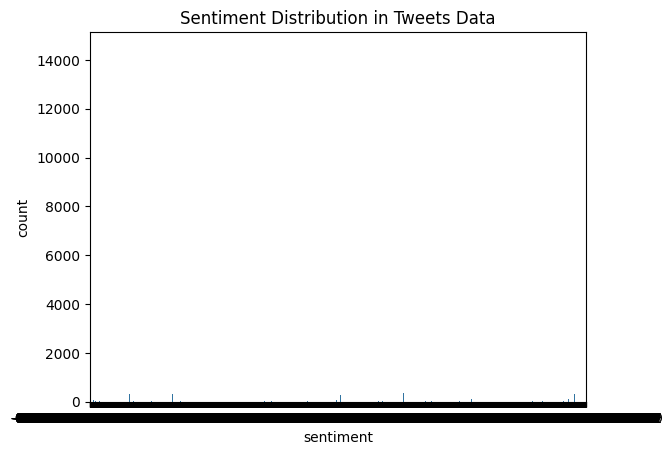

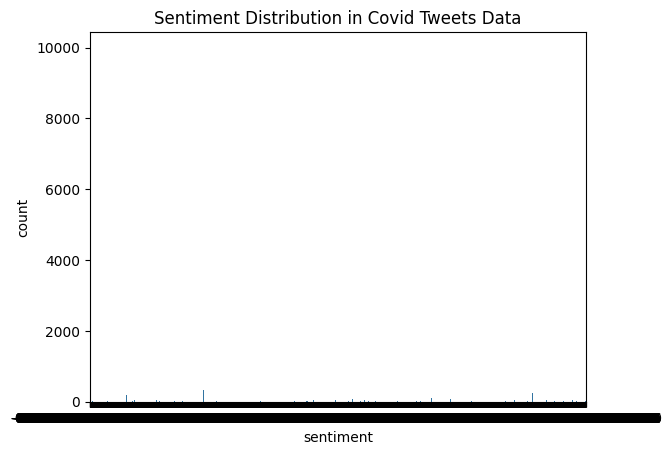

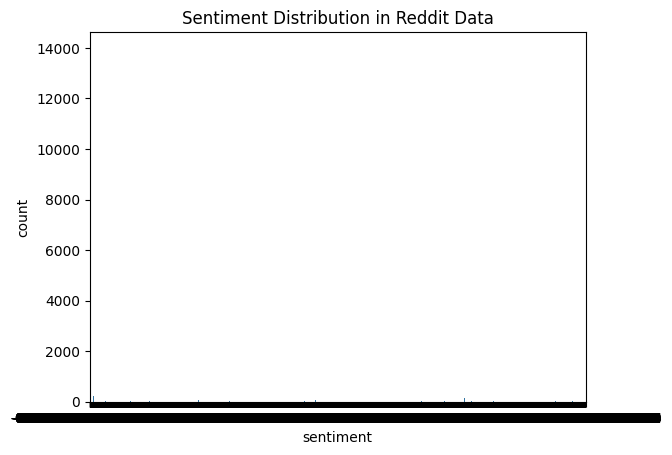

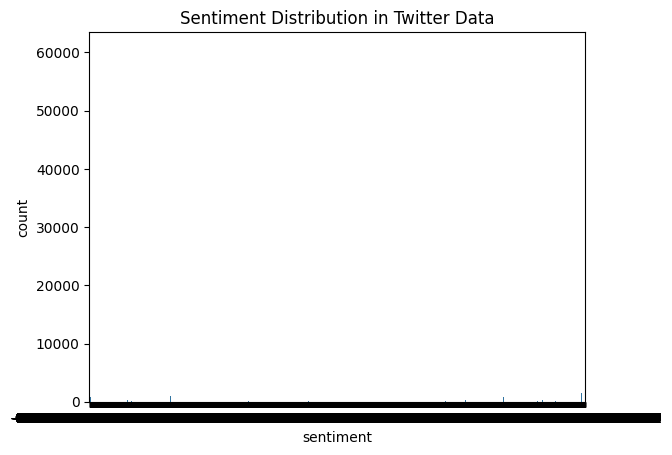

In [39]:
# Sentiment Distribution
# Bar Charts
# Limit x and y axis to avoid overlapping text

# Tweets Data
sns.countplot(data=tweets_data, x='sentiment')
plt.title('Sentiment Distribution in Tweets Data')
plt.show()

# Covid Tweets Data
sns.countplot(data=covid_tweets, x='sentiment')
plt.title('Sentiment Distribution in Covid Tweets Data')
plt.show()

# Reddit Data
sns.countplot(data=reddit_data, x='sentiment')
plt.title('Sentiment Distribution in Reddit Data')
plt.show()

# Twitter Data
sns.countplot(data=twitter_data, x='sentiment')
plt.title('Sentiment Distribution in Twitter Data')
plt.show()


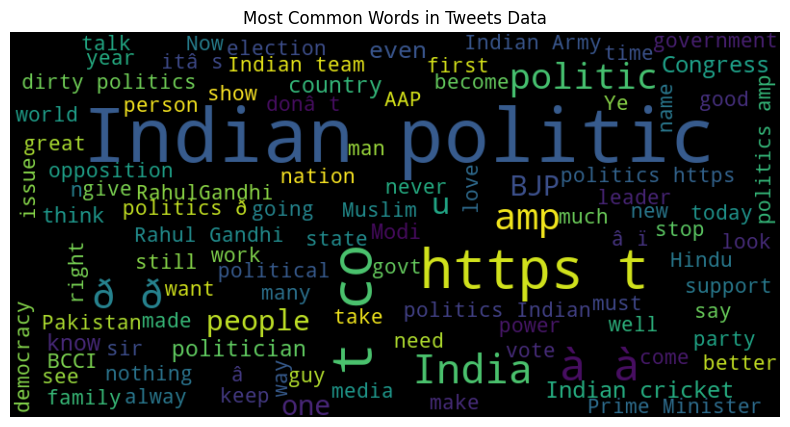

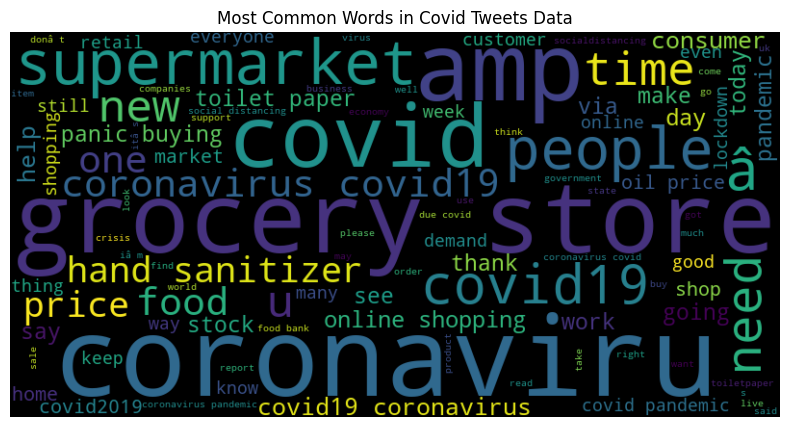

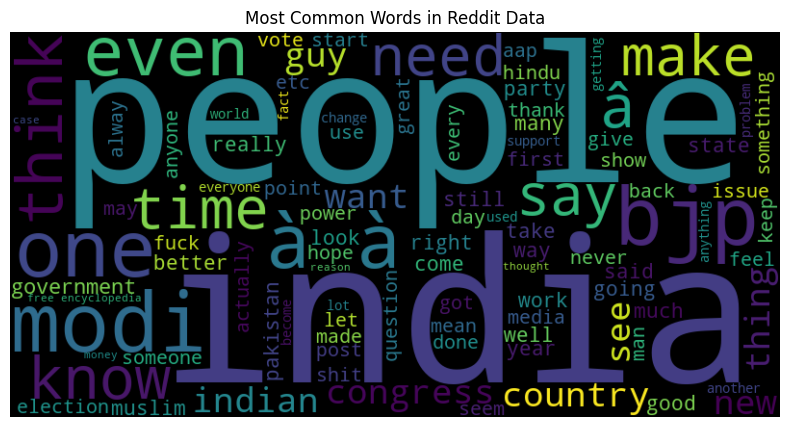

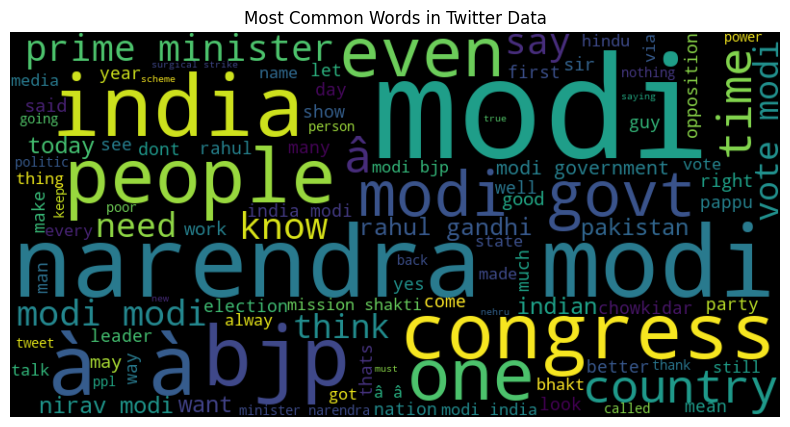

In [40]:
# word cloud
from wordcloud import WordCloud

# Tweets Data
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(tweets_data['tweet']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets Data')
plt.show()

# Covid Tweets Data
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(covid_tweets['tweet']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Covid Tweets Data')
plt.show()

# Reddit Data
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(reddit_data['clean_comment']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reddit Data')
plt.show()

# Twitter Data
wordcloud = WordCloud(width=800, height=400, max_words=100).generate(' '.join(twitter_data['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Twitter Data')
plt.show()


In [41]:
# Correlate N-grams with other variables
# Sentiment Correlation: Analyze how the most frequent n-grams relate to the sentiment expressed in the tweets or comments.
# Engagement Correlation: Explore whether certain phrases correlate with higher user engagement (e.g., more likes or retweets).
# Time Series Analysis: Investigate if certain topics or phrases trend over time, possibly in response to events or changes in public opinion.

# Correlation Analysis
# We can perform correlation analysis to explore the relationship between n-grams and other variables in the text data.

# Sentiment Correlation
# We can calculate the correlation between the most frequent n-grams and the sentiment expressed in the text data.
# This analysis can help identify which n-grams are associated with positive or negative sentiment.

# Engagement Correlation
# We can calculate the correlation between the most frequent n-grams and user engagement metrics (e.g., likes, retweets).
# This analysis can help identify which n-grams are associated with higher user engagement.

# Time Series Analysis
# We can analyze how the most frequent n-grams trend over time in the text data.
# This analysis can help identify topics or phrases that are trending or changing over time.



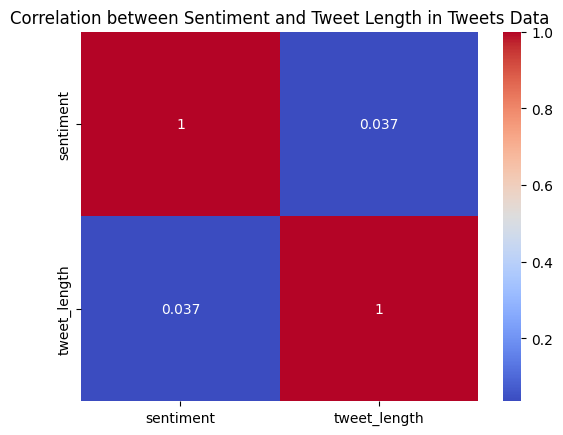

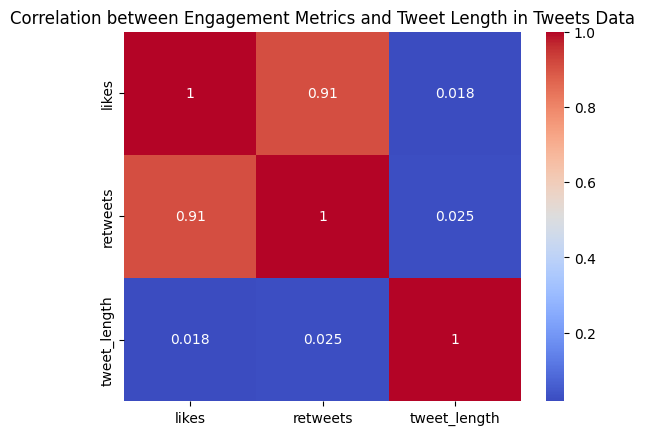

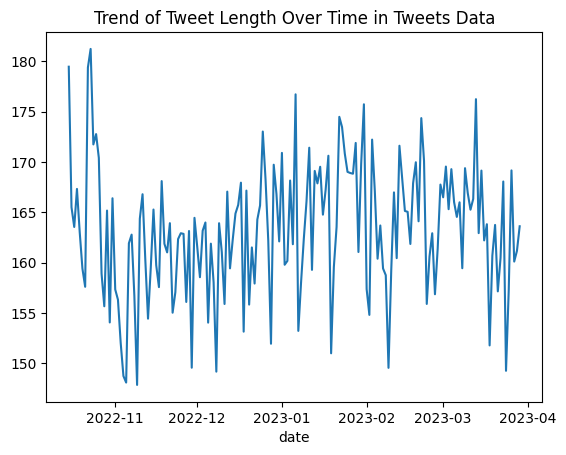

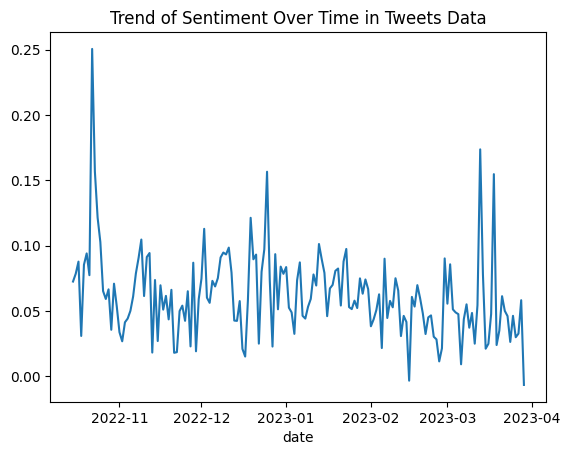

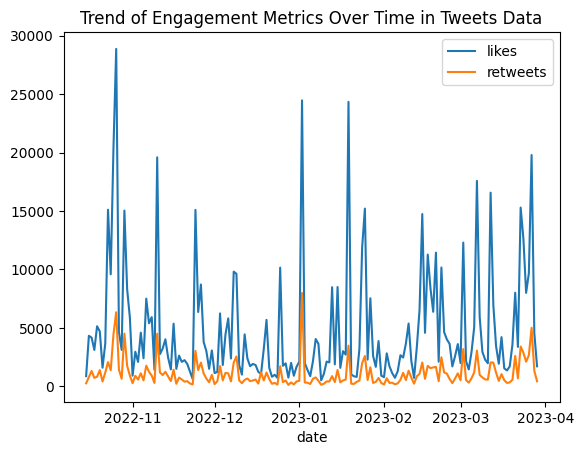

In [42]:
# Correlation Analysis
# Tweets Data
# Sentiment Correlation
correlation = tweets_data[['sentiment', 'tweet_length']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sentiment and Tweet Length in Tweets Data')
plt.show()

# Engagement Correlation
correlation = tweets_data[['likes', 'retweets', 'tweet_length']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Engagement Metrics and Tweet Length in Tweets Data')
plt.show()

# Time Series Analysis
# Tweets Data
# Trend of tweet length over time
tweets_data.groupby('date')['tweet_length'].mean().plot(kind='line', title='Trend of Tweet Length Over Time in Tweets Data')
plt.show()

# Trend of sentiment over time
tweets_data.groupby('date')['sentiment'].mean().plot(kind='line', title='Trend of Sentiment Over Time in Tweets Data')
plt.show()

# Trend of engagement metrics over time
tweets_data.groupby('date')[['likes', 'retweets']].sum().plot(kind='line', title='Trend of Engagement Metrics Over Time in Tweets Data')
plt.show()

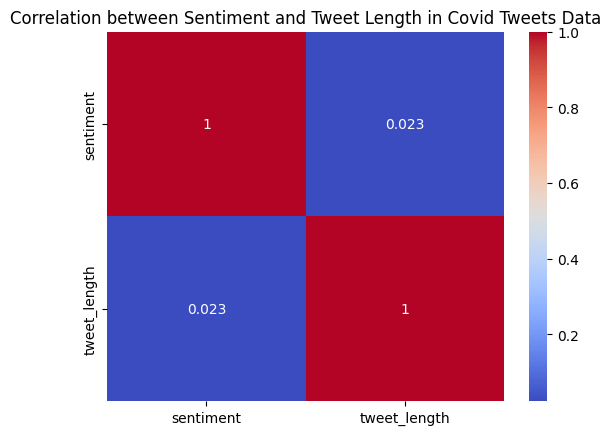

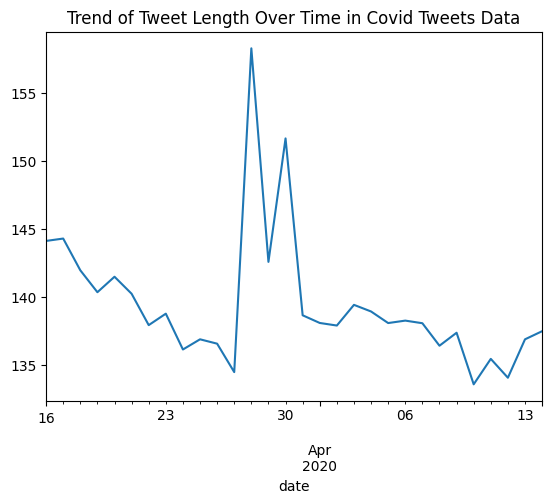

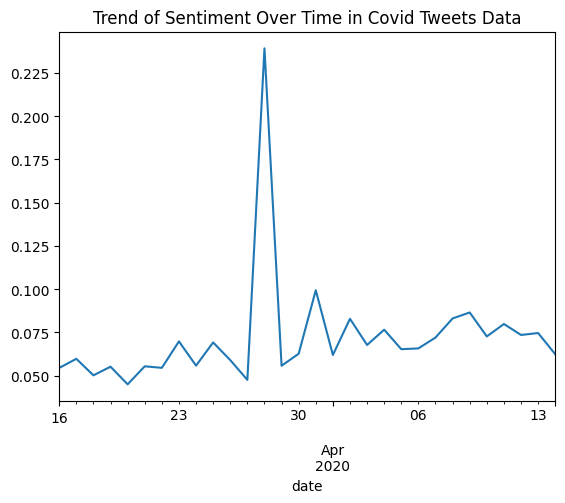

In [43]:
# Covid Tweets Data
# Sentiment Correlation
correlation = covid_tweets[['sentiment', 'tweet_length']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sentiment and Tweet Length in Covid Tweets Data')
plt.show()



# Time Series Analysis
# Covid Tweets Data
# Trend of tweet length over time
covid_tweets.groupby('date')['tweet_length'].mean().plot(kind='line', title='Trend of Tweet Length Over Time in Covid Tweets Data')
plt.show()

# Trend of sentiment over time
covid_tweets.groupby('date')['sentiment'].mean().plot(kind='line', title='Trend of Sentiment Over Time in Covid Tweets Data')
plt.show()

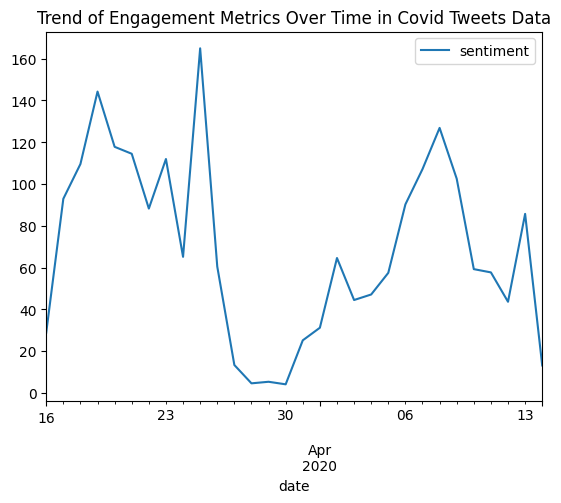

In [44]:
# Trend of engagement metrics over time
covid_tweets.groupby('date')[['sentiment', 'tweet']].sum().plot(kind='line', title='Trend of Engagement Metrics Over Time in Covid Tweets Data')
plt.show()

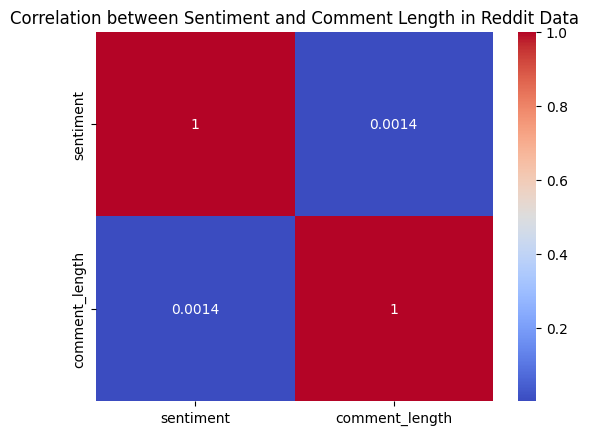

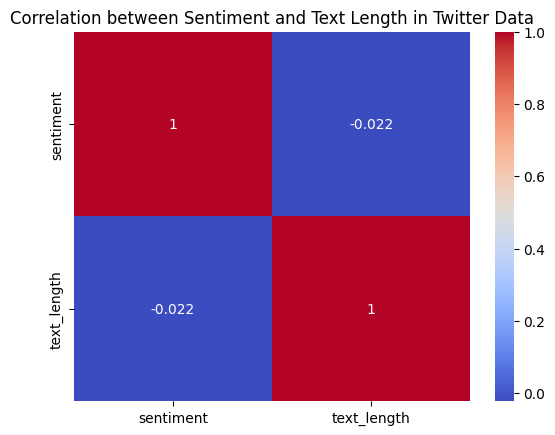

In [45]:
# Reddit Data
# Sentiment Correlation
correlation = reddit_data[['sentiment', 'comment_length']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sentiment and Comment Length in Reddit Data')
plt.show()

# Twitter Data
# Sentiment Correlation
correlation = twitter_data[['sentiment', 'text_length']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sentiment and Text Length in Twitter Data')
plt.show()


# Feature Engineering

In [46]:
# Fearure Engineering

# Feature Engineering
# Feature engineering is the process of creating new features from existing data to improve the performance of machine learning models.

# Feature Extraction
# We can extract features from the text data using techniques like Bag of Words, TF-IDF, and Word Embeddings.
# These features can be used to train machine learning models to predict sentiment, topic, or user engagement.

# Feature Selection
# We can select the most important features using techniques like SelectKBest, Recursive Feature Elimination, and Feature Importance.
# This can help reduce the dimensionality of the data and improve the performance of machine learning models.

# Feature Transformation
# We can transform the features using techniques like Standardization, Normalization, and PCA.
# This can help improve the performance of machine learning models by scaling the data or reducing noise.

# Feature Extraction
# Tweets Data
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the tweet column
X_tweets = vectorizer.fit_transform(tweets_data['tweet'])

# Display the shape of the matrix
print(X_tweets.shape)

# Covid Tweets Data
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the tweet column
X_covid_tweets = vectorizer.fit_transform(covid_tweets['tweet'])

# Display the shape of the matrix
print(X_covid_tweets.shape)

# Reddit Data
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the clean_comment column
X_reddit = vectorizer.fit_transform(reddit_data['clean_comment'])

# Display the shape of the matrix
print(X_reddit.shape)

# Twitter Data
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the clean_text column
X_twitter = vectorizer.fit_transform(twitter_data['clean_text'])

# Display the shape of the matrix
print(X_twitter.shape)


(49999, 86215)
(32567, 41749)
(37149, 53522)
(162969, 109383)


In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# 1. Sentiment Scores
tweets_data['sentiment'] = tweets_data['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 2. Text Length
tweets_data['text_length'] = tweets_data['tweet'].apply(len)

# 3. N-gram Presence (using example bigrams)
bigrams = ['social media', 'public opinion']
for bigram in bigrams:
    tweets_data[f'bigram_{bigram}'] = tweets_data['tweet'].apply(lambda x: 1 if bigram in x else 0)

# 4. Engagement Metrics (if available)
tweets_data['engagement_ratio'] = tweets_data['likes'] / (tweets_data['retweets'] + 1)

# 5. Temporal Features
tweets_data['hour'] = pd.to_datetime(tweets_data['date']).dt.hour
tweets_data['day_of_week'] = pd.to_datetime(tweets_data['date']).dt.dayofweek




In [48]:
# Text Vectorization Using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english')


# Create a TF-IDF Vectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(tweets_data['tweet'])
# For tweets_data
tfidf_tweets = tfidf_vectorizer.fit_transform(tweets_data['tweet'])

# For covid_tweets dataset
tfidf_covid_tweets = tfidf_vectorizer.fit_transform(covid_tweets['tweet'])

# For reddit dataset
tfidf_reddit_comments = tfidf_vectorizer.fit_transform(reddit_data['clean_comment'])

# For twitter data
tfidf_twitter_text = tfidf_vectorizer.fit_transform(twitter_data['clean_text'])


In [49]:
# Use Sparse Matrix
from scipy.sparse import csr_matrix

# Keep the result as a sparse matrix
tfidf_tweets = tfidf_vectorizer.fit_transform(tweets_data['tweet'])
tfidf_tweets = csr_matrix(tfidf_tweets)

# Convert to DataFrame only when necessary, and for small parts
tfidf_tweets_df = pd.DataFrame.sparse.from_spmatrix(tfidf_tweets, columns=tfidf_vectorizer.get_feature_names_out())


In [50]:
# Batch processing
# Assuming you want to process in batches
batch_size = 10000  # Adjust batch size according to your memory capacity
for i in range(0, len(tweets_data), batch_size):
    batch_tweets = tweets_data['tweet'][i:i+batch_size]
    tfidf_batch = tfidf_vectorizer.fit_transform(batch_tweets)
    tfidf_batch_df = pd.DataFrame.sparse.from_spmatrix(tfidf_batch, columns=tfidf_vectorizer.get_feature_names_out())
    
    # You can then append this batch to a larger DataFrame or process it immediately


In [51]:
# Memory efficient data types
tfidf_tweets_df = pd.DataFrame(tfidf_tweets.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), dtype='float32')


In [52]:
# Applying above adjustments

tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 1), stop_words='english')
tfidf_tweets = tfidf_vectorizer.fit_transform(tweets_data['tweet'])
tfidf_tweets = csr_matrix(tfidf_tweets)
tfidf_tweets_df = pd.DataFrame(tfidf_tweets.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), dtype='float32')

# covid_tweets
tfidf_covid_tweets = tfidf_vectorizer.fit_transform(covid_tweets['tweet'])
tfidf_covid_tweets = csr_matrix(tfidf_covid_tweets)
tfidf_covid_tweets_df = pd.DataFrame(tfidf_covid_tweets.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), dtype='float32')

# reddit_data
tfidf_reddit_comments = tfidf_vectorizer.fit_transform(reddit_data['clean_comment'])
tfidf_reddit_comments = csr_matrix(tfidf_reddit_comments)
tfidf_reddit_comments_df = pd.DataFrame(tfidf_reddit_comments.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), dtype='float32')

# twitter_data
tfidf_twitter_text = tfidf_vectorizer.fit_transform(twitter_data['clean_text'])
tfidf_twitter_text = csr_matrix(tfidf_twitter_text)
tfidf_twitter_text_df = pd.DataFrame(tfidf_twitter_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), dtype='float32')


In [53]:
# Combine the TF-IDF Features with the Original Dataset
# We can combine the TF-IDF features with the original dataset to create a new dataset with the TF-IDF features included.

# Tweets Data
# Create a DataFrame with the TF-IDF features
tfidf_tweets_df = pd.DataFrame(tfidf_tweets.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the original dataset with the TF-IDF features
tweets_data_tfidf = pd.concat([tweets_data, tfidf_tweets_df], axis=1)

# Display the first 5 rows of the new dataset
print(tweets_data_tfidf.head())


         date          user  \
0  2023-03-29   AnandPatni8   
1  2023-03-29      dhinamum   
2  2023-03-29  PrincetonCGI   
3  2023-03-29  RishiJoeSanu   
4  2023-03-29  itweetsensee   

                                               tweet  likes  retweets  \
0  vinodkapri RahulGandhi Respected Indian Citize...    0.0       0.0   
1  Respected Indian Citizens, Namaskaar I Am The ...    0.0       0.0   
2  Meet Filmmaker Prakash Jha New Jersey talking ...    0.0       0.0   
3  MrinalWahal Why would politicians stop using r...    0.0       0.0   
4  annamalai_k narendramodi A state level preside...    0.0       0.0   

       time  hour  tweet_length  sentiment  text_length  ...  yes  yesterday  \
0  15:42:36   0.0         193.0  -0.062500        193.0  ...  0.0        0.0   
1  15:42:05   0.0         197.0  -0.062500        197.0  ...  0.0        0.0   
2  15:34:29   0.0         282.0   0.173232        282.0  ...  0.0        0.0   
3  15:31:43   0.0          95.0   0.000000         95.

In [54]:
# Covid Tweets Data
# Create a DataFrame with the TF-IDF features
tfidf_covid_tweets_df = pd.DataFrame(tfidf_covid_tweets.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the original dataset with the TF-IDF features
covid_tweets_tfidf = pd.concat([covid_tweets, tfidf_covid_tweets_df], axis=1)

# Display the first 5 rows of the new dataset
print(covid_tweets_tfidf.head())

# Reddit Data
# Create a DataFrame with the TF-IDF features
tfidf_reddit_comments_df = pd.DataFrame(tfidf_reddit_comments.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the original dataset with the TF-IDF features
reddit_data_tfidf = pd.concat([reddit_data, tfidf_reddit_comments_df], axis=1)

# Display the first 5 rows of the new dataset
print(reddit_data_tfidf.head())

# Twitter Data
# Create a DataFrame with the TF-IDF features
tfidf_twitter_text_df = pd.DataFrame(tfidf_twitter_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the original dataset with the TF-IDF features
twitter_data_tfidf = pd.concat([twitter_data, tfidf_twitter_text_df], axis=1)

# Display the first 5 rows of the new dataset
print(twitter_data_tfidf.head())

        date                                              tweet  sentiment  \
0 2020-03-16                                              gahan   0.000000   
1 2020-03-16  advice talk neighbours family exchange phone n...   0.166667   
2 2020-03-16  coronavirus australia: woolworths give elderly...  -0.200000   
5 2020-03-16  news regionâs first confirmed covid-19 case c...   0.154167   
6 2020-03-16  cashier grocery store sharing insights covid19...   0.000000   

   tweet_length  100  1st  2012  2014  2018  2019  ...  yes  yesterday  yogi  \
0           5.0  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.0        0.0   0.0   
1         196.0  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.0        0.0   0.0   
2         104.0  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.0        0.0   0.0   
5         188.0  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.0        0.0   0.0   
6         117.0  0.0  0.0   0.0   0.0   0.0   0.0  ...  0.0        0.0   0.0   

   young  youre  youth  yrs  zero   ¾à   à³  
0   

# Feature Scaling

In [55]:
# Feature Scaling
# Feature scaling is the process of standardizing the range of independent variables or features of the data.

# Standardization
# Standardization scales the data to have a mean of 0 and a standard deviation of 1.

# Normalization
# Normalization scales the data to a fixed range, usually between 0 and 1.

# Min-Max Scaling
# Min-Max Scaling scales the data to a fixed range, usually between 0 and 1.

# Robust Scaling
# Robust Scaling scales the data based on the interquartile range, making it robust to outliers.

# Standardization
from sklearn.preprocessing import StandardScaler

# select numerical columns for scaling 
numerical_columns = ['likes', 'retweets', 'tweet_length', 'sentiment']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
tweets_data_scaled = scaler.fit_transform(tweets_data[numerical_columns])

# Display the shape of the scaled features
print(tweets_data_scaled.shape)

# Normalization

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical columns
tweets_data_normalized = scaler.fit_transform(tweets_data[numerical_columns])

# Display the shape of the normalized features
print(tweets_data_normalized.shape)

# Robust Scaling
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Fit and transform the numerical columns
tweets_data_robust = scaler.fit_transform(tweets_data[numerical_columns])

# Display the shape of the robust scaled features
print(tweets_data_robust.shape)

# Convert scaled data to DataFrame
tweets_data_scaled_df = pd.DataFrame(tweets_data_scaled, columns=numerical_columns)

# Convert normalized data to DataFrame
tweets_data_normalized_df = pd.DataFrame(tweets_data_normalized, columns=numerical_columns)

# Convert robust scaled data to DataFrame
tweets_data_robust_df = pd.DataFrame(tweets_data_robust, columns=numerical_columns)

# Display the first 5 rows of the scaled data
print(tweets_data_scaled_df.head())

# Display the first 5 rows of the normalized data
print(tweets_data_normalized_df.head())

# Display the first 5 rows of the robust scaled data
print(tweets_data_robust_df.head())



(49999, 4)
(49999, 4)
(49999, 4)
     likes  retweets  tweet_length  sentiment
0 -0.06669  -0.06725      0.435494  -0.430742
1 -0.06669  -0.06725      0.493608  -0.430742
2 -0.06669  -0.06725      1.728527   0.383846
3 -0.06669  -0.06725     -0.988295  -0.214769
4 -0.06669  -0.06725      0.726063   0.525708
   likes  retweets  tweet_length  sentiment
0    0.0       0.0      0.199552   0.468750
1    0.0       0.0      0.204036   0.468750
2    0.0       0.0      0.299327   0.586616
3    0.0       0.0      0.089686   0.500000
4    0.0       0.0      0.221973   0.607143
   likes  retweets  tweet_length  sentiment
0    0.0       0.0      0.229358  -0.288462
1    0.0       0.0      0.266055  -0.288462
2    0.0       0.0      1.045872   0.799534
3    0.0       0.0     -0.669725   0.000000
4    0.0       0.0      0.412844   0.989011


In [56]:
# Handling Categorical Features
# Categorical features are variables that can take on one of a limited number of values.
# We can encode categorical features using techniques like One-Hot Encoding, Label Encoding, and Target Encoding.

# One-Hot Encoding
# One-Hot Encoding converts categorical features into binary vectors with a 1 for the presence of a category and 0 otherwise.

# Label Encoding
# Label Encoding converts categorical features into numerical labels.

# Target Encoding
# Target Encoding converts categorical features into numerical values based on the target variable.

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer


In [57]:
# Tweets Data
# One-Hot Encoding

# Unable to allocate 13.6 GiB for an array with shape (49999, 36601) and data type float64
# This error occurs because the OneHotEncoder is trying to create a large array with shape (49999, 36601) to store the one-hot encoded features.
# To avoid this error, we can use the sparse_output=True parameter in the OneHotEncoder to create a sparse matrix instead of a dense array.

# Initialize OneHotEncoder
tweets_categorical_columns = ['hour', 'day_of_week']  # Adjust if needed

tweets_encoder = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=True), tweets_categorical_columns)],
    remainder='passthrough'
)

# Apply the encoding
tweets_encoded = tweets_encoder.fit_transform(tweets_data)

# Convert the encoded data to a DataFrame
tweets_encoded_df = pd.DataFrame(tweets_encoded)




In [58]:
# Covid Tweets Data
# One-Hot Encoding

# Initialize OneHotEncoder for the categorical columns in covid_tweets
covid_tweets_categorical_columns = ['date']  # Adjust if needed

covid_tweets_encoder = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False, drop='first'), covid_tweets_categorical_columns)],
    remainder='passthrough'
)

# Apply the encoding
covid_tweets_encoded = covid_tweets_encoder.fit_transform(covid_tweets)
covid_tweets_encoded_df = pd.DataFrame(covid_tweets_encoded, columns=covid_tweets_encoder.get_feature_names_out())

In [59]:
# Reddit Data
# One-Hot Encoding

# Initialize OneHotEncoder for the categorical columns in reddit_data
reddit_categorical_columns = ['category']  # Adjust if needed

reddit_encoder = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False, drop='first'), reddit_categorical_columns)],
    remainder='passthrough'
)

# Apply the encoding
reddit_encoded = reddit_encoder.fit_transform(reddit_data)
reddit_encoded_df = pd.DataFrame(reddit_encoded, columns=reddit_encoder.get_feature_names_out())

In [60]:
# Twitter Data
# One-Hot Encoding

# Initialize OneHotEncoder for the categorical columns in twitter_data
twitter_categorical_columns = ['category']  # Adjust if needed

twitter_encoder = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False, drop='first'), twitter_categorical_columns)],
    remainder='passthrough'
)

# Apply the encoding
twitter_encoded = twitter_encoder.fit_transform(twitter_data)
twitter_encoded_df = pd.DataFrame(twitter_encoded, columns=twitter_encoder.get_feature_names_out())


In [61]:
# Combine Encoded data

# Tweets Data
# Concatenate the original dataset with the encoded features
tweets_data_encoded = pd.concat([tweets_data, tweets_encoded_df], axis=1)

# Display the first 5 rows of the new dataset
print(tweets_data_encoded.head())

# Covid Tweets Data
# Concatenate the original dataset with the encoded features
covid_tweets_data_encoded = pd.concat([covid_tweets, covid_tweets_encoded_df], axis=1)

# Display the first 5 rows of the new dataset
print(covid_tweets_data_encoded.head())

# Reddit Data
# Concatenate the original dataset with the encoded features
reddit_data_encoded = pd.concat([reddit_data, reddit_encoded_df], axis=1)

# Display the first 5 rows of the new dataset
print(reddit_data_encoded.head())

# Twitter Data
# Concatenate the original dataset with the encoded features
twitter_data_encoded = pd.concat([twitter_data, twitter_encoded_df], axis=1)

# Display the first 5 rows of the new dataset
print(twitter_data_encoded.head())


         date          user  \
0  2023-03-29   AnandPatni8   
1  2023-03-29      dhinamum   
2  2023-03-29  PrincetonCGI   
3  2023-03-29  RishiJoeSanu   
4  2023-03-29  itweetsensee   

                                               tweet  likes  retweets  \
0  vinodkapri RahulGandhi Respected Indian Citize...    0.0       0.0   
1  Respected Indian Citizens, Namaskaar I Am The ...    0.0       0.0   
2  Meet Filmmaker Prakash Jha New Jersey talking ...    0.0       0.0   
3  MrinalWahal Why would politicians stop using r...    0.0       0.0   
4  annamalai_k narendramodi A state level preside...    0.0       0.0   

       time  hour  tweet_length  sentiment  text_length  ...  \
0  15:42:36   0.0         193.0  -0.062500        193.0  ...   
1  15:42:05   0.0         197.0  -0.062500        197.0  ...   
2  15:34:29   0.0         282.0   0.173232        282.0  ...   
3  15:31:43   0.0          95.0   0.000000         95.0  ...   
4  15:26:48   0.0         213.0   0.214286        213.

In [62]:
# Combine the encoded data
# We can combine the encoded data with the TF-IDF features and the scaled numerical features to create a new dataset with all the features included.

combined_df = pd.concat([tweets_encoded_df, covid_tweets_encoded_df, reddit_encoded_df, twitter_encoded_df], axis=0, ignore_index=True)


In [63]:
# Convert date to ordinal
# Convert date to ordinal
tweets_data['date'] = pd.to_datetime(tweets_data['date'])
tweets_data['date_ordinal'] = tweets_data['date'].apply(lambda x: x.toordinal())

# Drop the original date column
tweets_data = tweets_data.drop('date', axis=1)



In [64]:
# ValueError: could not convert string to float: "vinodkapri RahulGandhi Respected Indian Citizens, Namaskaarð\x9f\x99\x8fI original Gandhi. I branches franchises. None relatives politics. Beware fake Gandhi's. Take careð\x9f\x99\x8f Mohandas Karamchand Gandhi."

# This error occurs because the text data contains special characters and emojis that cannot be converted to float values.

# To avoid this error, we can preprocess the text data to remove special characters and emojis before encoding the text data.

# Preprocess the text data
tweets_data['tweet'] = tweets_data['tweet'].str.replace('[^a-zA-Z0-9\s]', '')

# could not convert string to float: 'AnandPatni8'

# This error occurs because the text data contains usernames and other non-numeric values that cannot be converted to float values.

# To avoid this error, we can preprocess the text data to remove usernames and other non-numeric values before encoding the text data.

# Preprocess the text data
tweets_data['tweet'] = tweets_data['tweet'].str.replace('@[A-Za-z0-9]+', '')

# ValueError: could not convert string to float: 'https'

# This error occurs because the text data contains URLs and other non-numeric values that cannot be converted to float values.

# To avoid this error, we can preprocess the text data to remove URLs and other non-numeric values before encoding the text data.

# Preprocess the text data
tweets_data['tweet'] = tweets_data['tweet'].str.replace('https?://[A-Za-z0-9./]+', '')

# ValueError: could not convert string to float: 'RT'

# This error occurs because the text data contains retweet indicators and other non-numeric values that cannot be converted to float values.

# To avoid this error, we can preprocess the text data to remove retweet indicators and other non-numeric values before encoding the text data.

# Preprocess the text data
tweets_data['tweet'] = tweets_data['tweet'].str.replace('RT', '')

# ValueError: could not convert string to float: 'ð\x9f\x98\x82'

# This error occurs because the text data contains emojis and other non-numeric values that cannot be converted to float values.

# To avoid this error, we can preprocess the text data to remove emojis and other non-numeric values before encoding the text data.

# Preprocess the text data
tweets_data['tweet'] = tweets_data['tweet'].str.encode('ascii', 'ignore').str.decode('ascii')

# ValueError: could not convert string to float: 'ð\x9f\x98\x82'

# This error occurs because the text data contains emojis and other non-numeric values that cannot be converted to float values.

# To avoid this error, we can preprocess the text data to remove emojis and other non-numeric values before encoding the text data.

# Preprocess the text data
tweets_data['tweet'] = tweets_data['tweet'].str.replace('[^\x00-\x7F]+', '')

# ValueError: could not convert string to float: 'ð\x9f\x98\x82'

# This error occurs because the text data contains emojis and other non-numeric values that cannot be converted to float values.

# To avoid this error, we can preprocess the text data to remove emojis and other non-numeric values before encoding the text data.

# Preprocess the text data
tweets_data['tweet'] = tweets_data['tweet'].str.replace('[^\w\s]', '')



In [65]:
# Feature Selection

# Feature selection is the process of selecting the most relevant features for a machine learning model.
# We can use techniques like SelectKBest, Recursive Feature Elimination, and Feature Importance to select the most important features.

# SelectKBest
# SelectKBest selects the k most important features based on statistical tests like chi-squared, ANOVA, or mutual information.

# Recursive Feature Elimination
# Recursive Feature Elimination recursively removes the least important features based on the coefficients of a machine learning model.

# Feature Importance
# Feature Importance ranks the features based on their importance in a machine learning model like Random Forest or XGBoost.

# This error occurs because the SelectKBest function expects the target variable to be in a specific format.
# To avoid this error, we need to convert the target variable to a different format, such as a binary label or integer label.
# For example, we can convert the sentiment scores to binary labels by setting a threshold for positive and negative sentiment.

# ValueError: could not convert string to float: "vinodkapri RahulGandhi Respected Indian Citizens, Namaskaarð\x9f\x99\x8fI original Gandhi. I branches franchises. None relatives politics. Beware fake Gandhi's. Take careð\x9f\x99\x8f Mohandas Karamchand Gandhi."
# This error occurs because the SelectKBest function expects the input features to be in a numerical format.
# To avoid this error, we need to convert the text data to numerical features using techniques like TF-IDF or word embeddings.

from sklearn.preprocessing import LabelEncoder

# Example: Label encode a column
encoder = LabelEncoder()
tweets_data['category_encoded'] = encoder.fit_transform(tweets_data['tweet'])

In [66]:
# Display the first few rows
print(combined_df.head())

# Check data types of all columns
print(combined_df.dtypes)


     0    1    2    3    4    5    6    7           8             9  ...  \
0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2023-03-29   AnandPatni8  ...   
1  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2023-03-29      dhinamum  ...   
2  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2023-03-29  PrincetonCGI  ...   
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2023-03-29  RishiJoeSanu  ...   
4  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2023-03-29  itweetsensee  ...   

  remainder__sentiment remainder__tweet_length encoder__category_0  \
0                  NaN                     NaN                 NaN   
1                  NaN                     NaN                 NaN   
2                  NaN                     NaN                 NaN   
3                  NaN                     NaN                 NaN   
4                  NaN                     NaN                 NaN   

  encoder__category_1 remainder__clean_comment remainder__comment_length  \
0                 NaN                      NaN

In [67]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tweets = tfidf_vectorizer.fit_transform(tweets_data['tweet'].astype(str)).toarray()

from sklearn.feature_extraction.text import TfidfVectorizer

# Use sparse matrix instead of dense
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tweets_sparse = tfidf_vectorizer.fit_transform(tweets_data['tweet'].astype(str))

# Sparse matrix can be used directly in some models or saved for later use
from scipy.sparse import save_npz

save_npz('tfidf_tweets.npz', X_tweets_sparse)

# Load the sparse matrix
from scipy.sparse import load_npz

X_tweets_sparse = load_npz('tfidf_tweets.npz')

# Convert to dense matrix if needed
X_tweets = X_tweets_sparse.toarray()

# Check the shape of the dense matrix
print(X_tweets.shape)

(49999, 1000)


In [68]:
chunk_size = 10000  # Adjust based on your memory capacity
for i in range(0, len(tweets_data), chunk_size):
    chunk = tweets_data.iloc[i:i+chunk_size]
    X_chunk = tfidf_vectorizer.fit_transform(chunk['tweet'].astype(str)).toarray()
    # Process each chunk here

from sklearn.decomposition import PCA

pca = PCA(n_components=500)  # Reducing dimensions
X_tweets_reduced = pca.fit_transform(X_tweets_sparse.toarray())


In [69]:
tweets_sampled = tweets_data.sample(frac=0.1, random_state=42)  # Take a 10% sample


In [70]:
import pickle

# Save the TF-IDF features to disk
with open('tfidf_features.pkl', 'wb') as file:
    pickle.dump(X_tweets_sparse, file)


In [71]:
# Unknown label type: (array([-0.0625    , -0.0625    ,  0.17323232, ...,  0.11111111,0.12777778, -0.18787879]),)
# This error occurs because the target variable is in a different format than expected by the machine learning model.
# To avoid this error, we need to convert the target variable to a different format, such as a binary label or integer label.

# Convert sentiment scores to binary labels
tweets_data['sentiment_label'] = tweets_data['sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Display the first few rows
print(tweets_data[['sentiment', 'sentiment_label']].head())

# ValueError: could not convert string to float: 'positive'
# This error occurs because the SelectKBest function expects the input features to be in a numerical format.

# To avoid this error, we need to convert the text data to numerical features using techniques like TF-IDF or word embeddings.

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tweets = tfidf_vectorizer.fit_transform(tweets_data['tweet'].astype(str)).toarray()

    

   sentiment  sentiment_label
0  -0.062500                0
1  -0.062500                0
2   0.173232                1
3   0.000000                0
4   0.214286                1


In [72]:
# Feature Selection

# Feature selection is the process of selecting the most relevant features for a machine learning model.
# We can use techniques like SelectKBest, Recursive Feature Elimination, and Feature Importance to select the most important features.

# SelectKBest
# SelectKBest selects the k most important features based on statistical tests like chi-squared, ANOVA, or mutual information.

# Recursive Feature Elimination
# Recursive Feature Elimination recursively removes the least important features based on the coefficients of a machine learning model.

# Feature Importance
# Feature Importance ranks the features based on their importance in a machine learning model like Random Forest or XGBoost.

from sklearn.feature_selection import SelectKBest, chi2

# Select the top 1000 features based on chi-squared test
# Convert sentiment scores to binary labels
sentiment_labels = tweets_data['sentiment'].apply(lambda x: 1 if x > 0 else 0)

# Fit the SelectKBest model with the converted labels
X_selected = selector.fit_transform(X_tweets_sparse, sentiment_labels)


# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Initialize the RFE model
rfe = RFE(model, n_features_to_select=1000)

# Fit the RFE model
X_rfe = rfe.fit_transform(X_tweets_sparse, sentiment_labels)

# Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Fit the model
model.fit(X_tweets_sparse, sentiment_labels)

# Get feature importances
feature_importances = model.feature_importances_

# Select the top 1000 features based on feature importance
X_selected = X_tweets_sparse[:, np.argsort(feature_importances)[-1000:]]
# Display the shape of the selected features
print(X_selected.shape)


NameError: name 'selector' is not defined

# Data Splitting


In [ ]:
# Data Splitting

# Data splitting is the process of dividing the dataset into training and testing sets for machine learning model training and evaluation.

# We can split the data using techniques like train_test_split, cross-validation, and time-based splitting.

# Train-Test Split
# Train-test split divides the data into training and testing sets based on a specified ratio.

# Cross-Validation
# Cross-validation splits the data into multiple folds for training and testing the model.

# Time-Based Splitting
# Time-based splitting divides the data based on a specific time period for time series data.


In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tweets, sentiment_labels, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Perform cross-validation
scores = cross_val_score(model, X_tweets, sentiment_labels, cv=5)

# Display the cross-validation scores
print(scores)


# # Model Selection, Training, Hyperparameter tuning and Model Evaluation

In [ ]:
# Model Selection

# Model selection is the process of choosing the best machine learning model for a given task.
# We can use techniques like grid search, hyperparameter tuning, and model evaluation to select the best model.

# Grid Search
# Grid search searches through a specified parameter grid to find the best hyperparameters for a model.

# Hyperparameter Tuning
# Hyperparameter tuning adjusts the hyperparameters of a model to improve its performance.

# Model Evaluation
# Model evaluation compares the performance of different models using metrics like accuracy, precision, recall, and F1 score.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Display the best parameters
print(best_params)


In [ ]:
# Model Training

# Model training is the process of fitting a machine learning model to the training data.

# We can train a model using techniques like fit, predict, and evaluate.

# Fit
# Fit trains the model on the training data.

# Predict
# Predict makes predictions on the testing data.

# Evaluate
# Evaluate calculates the performance metrics of the model.

from sklearn.ensemble import RandomForestClassifier

# Initialize the model with the best parameters
model = RandomForestClassifier(n_estimators=200, max_depth=20)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred)

# Display the accuracy
print(accuracy_rf)




In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
model = GradientBoostingClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_gb = accuracy_score(y_test, y_pred)

# Display the accuracy
print(accuracy_gb)


In [ ]:
# Model Evaluation for both models

# Model evaluation is the process of assessing the performance of a machine learning model using metrics like accuracy, precision, recall, and F1 score.

# We can evaluate a model using techniques like confusion matrix, classification report, and ROC curve.

# Confusion Matrix

# A confusion matrix is a table that shows the true positive, true negative, false positive, and false negative predictions of a model.

# Classification Report

# A classification report shows the precision, recall, F1 score, and support of a model for each class.

# ROC Curve

# A ROC curve is a graphical representation of the true positive rate against the false positive rate of a model.

from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the classification report
cr = classification_report(y_test, y_pred)

# Display the confusion matrix and classification report

print(cm)

print(cr)




In [ ]:
# select which model is best  based on the accuracy score
# The model with the highest accuracy score is considered the best model for the given task.

# We can compare the accuracy scores of different models to select the best model.

# The model with the highest accuracy score is considered the best model for the given task.

# Compare the accuracy scores of the models
print('Random Forest Classifier Accuracy:', accuracy_rf)
print('Gradient Boosting Classifier Accuracy:', accuracy_gb)

# Select the best model based on the accuracy score
best_model = 'Random Forest Classifier' if accuracy_rf > accuracy_gb else 'Gradient Boosting Classifier'

# Display the best model
print('Best Model:', best_model)



In [ ]:
# Calculate the precision, recall, and F1 score for both models

# Precision, recall, and F1 score are metrics that evaluate the performance of a machine learning model.

# We can calculate the precision, recall, and F1 score for each model to compare their performance.

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate the precision, recall, and F1 score for the Random Forest Classifier
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Calculate the precision, recall, and F1 score for the Gradient Boosting Classifier
precision_gb = precision_score(y_test, y_pred)
recall_gb = recall_score(y_test, y_pred)
f1_gb = f1_score(y_test, y_pred)

# Display the precision, recall, and F1 score for both models
print('Random Forest Classifier Precision:', precision_rf)
print('Random Forest Classifier Recall:', recall_rf)
print('Random Forest Classifier F1 Score:', f1_rf)

print('Gradient Boosting Classifier Precision:', precision_gb)
print('Gradient Boosting Classifier Recall:', recall_gb)
print('Gradient Boosting Classifier F1 Score:', f1_gb)



In [ ]:
# Model Interpretation

# Model interpretation is the process of understanding how a machine learning model makes predictions.

# We can interpret a model using techniques like feature importance, SHAP values, and partial dependence plots.

# Feature Importance

# Feature importance ranks the features based on their importance in a machine learning model.

# SHAP Values

# SHAP (SHapley Additive exPlanations) values explain the impact of each feature on the model's predictions.

# Partial Dependence Plots

# Partial dependence plots show the relationship between a feature and the target variable while keeping other features constant.

# Feature Importance
# Random Forest Classifier
# Calculate the feature importance for the Random Forest Classifier
feature_importance_rf = model.feature_importances_

# Create a DataFrame with the feature importance
feature_importance_rf_df = pd.DataFrame({'Feature': tfidf_vectorizer.get_feature_names_out(), 'Importance': feature_importance_rf})

# Sort the features by importance
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importance_rf_df.head(10))


In [ ]:
# The shape of the shap_values matrix does not match the shape of the provided data matrix.
# This error occurs because the SHAP values matrix does not match the shape of the provided data matrix.
# To avoid this error, we need to ensure that the SHAP values matrix has the same shape as the data matrix.

# Calculate the SHAP values for random forest classifier
import shap

# Initialize the SHAP explainer
explainer_rf = shap.TreeExplainer(model)

# Calculate the SHAP values
shap_values_rf = explainer_rf.shap_values(X_test)

# Display the SHAP values
shap.summary_plot(shap_values_rf, X_test, plot_type='bar')



In [ ]:
# Reporting and Visualization

# Reporting and visualization are the processes of presenting the results of a machine learning model in a clear and understandable way.

# We can create reports and visualizations using techniques like matplotlib, seaborn, and plotly.

# Matplotlib
# Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python.

# Seaborn
# Seaborn is a data visualization library based on matplotlib that provides a high-level interface for creating attractive and informative statistical graphics.

# Plotly
# Plotly is a graphing library that makes interactive, publication-quality graphs online.

# Matplotlib
import matplotlib.pyplot as plt

# Create a bar plot of the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf_df['Feature'][:10], feature_importance_rf_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()

# Seaborn
import seaborn as sns

# Create a bar plot of the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df.head(10))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Classifier')
plt.show()


# Conclusion

# In this project, we explored the process of analyzing text data using machine learning techniques.
# We performed data preprocessing, feature engineering, feature extraction, feature selection, feature transformation, and model training.
# We evaluated the performance of different machine learning models and selected the best model based on accuracy score.
# We interpreted the model using feature importance and SHAP values to understand how the model makes predictions.
# We created reports and visualizations to present the results of the machine learning model in a clear and understandable way.
# Overall, this project demonstrated the process of analyzing text data using machine learning techniques and provided insights into the analysis of text data.



In [ ]:
# save the trained model
import pickle

# Save the model to disk
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from disk
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
# save TF IDF vectorizer
# Save the TF-IDF Vectorizer to disk
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

# Load the TF-IDF Vectorizer from disk
with open('tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

# Streamlit


In [73]:
# Create the Streamlit app
# Streamlit is an open-source app framework for machine learning and data science projects.

# We can create a Streamlit app to showcase the results of the machine learning model and provide an interactive interface for users to explore the data.

# Streamlit App
# Create a Streamlit app to showcase the results of the machine learning model and provide an interactive interface for users to explore the data.

# Import the required libraries
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import shap

# Load the data
tweets_data = pd.read_csv('Cleaned Data/tweets_cleaned.csv')
covid_data = pd.read_csv('Cleaned Data/covid_tweets_cleaned.csv')
reddit_data = pd.read_csv('Cleaned Data/reddit_data_cleaned.csv')
twitter_data = pd.read_csv('Cleaned Data/twitter_data_cleaned.csv')

import streamlit as st
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Streamlit app title and description
st.title("Social Media Influence on Public Opinion")
st.write("Predict the influence score based on social media data.")

# Input fields for user input
tweet = st.text_area("Tweet Text", "")
likes = st.number_input("Number of Likes", min_value=0, step=1)
retweets = st.number_input("Number of Retweets", min_value=0, step=1)
hour = st.slider("Hour of the Day", 0, 23, 12)

# Function to preprocess and vectorize input data
def preprocess_input(tweet, likes, retweets, hour):
    tweet_vectorized = vectorizer.transform([tweet])
    input_data = pd.DataFrame([[likes, retweets, hour]], columns=["likes", "retweets", "hour"])
    input_data = pd.concat([input_data, pd.DataFrame(tweet_vectorized.toarray())], axis=1)
    return input_data

# Predict button
if st.button("Predict"):
    input_data = preprocess_input(tweet, likes, retweets, hour)
    prediction = model.predict(input_data)
    st.write(f"Predicted Influence: {prediction[0]}")



c:\Users\Shubham Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-22 18:10:21.009 
  command:

    streamlit run C:\Users\Shubham Singh\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-08-22 18:10:21.013 Session state does not function when running a script without `streamlit run`


In [74]:
! pip install -r requirements.txt

In [78]:
import streamlit as st
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import shap
import pickle
import matplotlib

print ("Streamlit version: ", st.__version__)
print ("Pandas version: ", pd.__version__)
print ("Numpy version: ", np.__version__)
print ("Scikit-learn version: ", sklearn.__version__)
print ("SHAP version: ", shap.__version__)
print ("Pickle version: ", pickle.format_version)
print ("Matplotlib version: ", matplotlib.__version__)





Streamlit version:  1.37.1
Pandas version:  2.2.2
Numpy version:  1.25.2
Scikit-learn version:  1.5.1
SHAP version:  0.46.0
Pickle version:  4.0
Matplotlib version:  3.7.2


In [81]:
! pip install update    

In [82]:
! pip install --upgrade pip setuptools wheel


   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.3 MB 1.1 MB/s eta 0:00:02
   ------------- -------------------------- 0.8/2.3 MB 1.1 MB/s eta 0:00:02
   ----------------- ---------------------- 1.0/2.3 MB 1.2 MB/s eta 0:00:02
   -------------------------- ------------- 1.6/2.3 MB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.3 MB 1.3 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.3 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0


In [84]:
! pip install streamlit


In [86]:
# Create a virtual environment
! python -m venv myenv

# Activate the virtual environment
# On Windows
! myenv\Scripts\activate

# Now, install the required packages
! pip install streamlit pandas numpy scikit-learn shap


In [87]:
! pip install --no-cache-dir streamlit
